In [1]:
using AbstractFFTs
using FFTW
using CairoMakie

In [2]:
function hann(L)
    ell = L + 1
    N = ell - 1
    n = 0:N
    w = @. 0.5 * (1 - cos.(2*π*n/N))
    return w[1:end-1]
end

function pad(data, N)
    new_data = zeros(Complex{Float64}, 2*N)
    start = Int(floor(N/2))
    new_data[1:N] = data
    return new_data
end

function hamm(L)
    ell = L + 1
    N = ell - 1
    n = 0:N
    w = @. 0.54 - 0.46 * cos.(2*π*n/N)
    return w[1:end-1]
end
function box(L)
    w = ones(L)
    return w
end

function tukey(L, r)
    x = (0:(L-1)) / (L-1)
    w = ones(L)
    filter1 = @. (0 <= x < r/2)
    filter2 = @. (1 - r/2 <= x <= 1)

    w[filter1] = @. 0.5 * (1 + cos(2*π/r*(x[filter1] - r/2)))
    w[filter2] = @. 0.5 * (1 + cos(2*π/r*(x[filter2]-1+r/2)))
    return w
end

function triangle(L)
    ell = L+1
    w = zeros(ell)
    if ell % 2 == 0
        ell_half = Int(ell/2)
        n1 = 1:ell_half
        n2 = (ell_half+1):ell
        w[n1] = @. (2 * n1 - 1)/ell
        w[n2] = @. 2 - (2 * n2 - 1)/ell
    else
        ell_half = Int((ell+1)/2)
        n1 = 1:ell_half
        n2 = (ell_half+1):ell
        w[n1] = @. (2 * n1)/ell
        w[n2] = @. 2 - (2 * n2)/ell
    end
    return w[1:end-1]
end

function flattopw(L)
    a0 = 0.21557895
    a1 = 0.41663158
    a2 = 0.277263158
    a3 = 0.083578947
    a4 = 0.006947368
    ell = L+1
    n = 0:(ell - 1)
    w = @. (a0 - a1*cos(2*π*n/(ell - 1))
              + a2*cos(4*π*n/(ell - 1))
              - a3*cos(6*π*n/(ell - 1))
              + a4*cos(8*π*n/(ell - 1)))
    return w[1:end-1]
end

flattopw (generic function with 1 method)

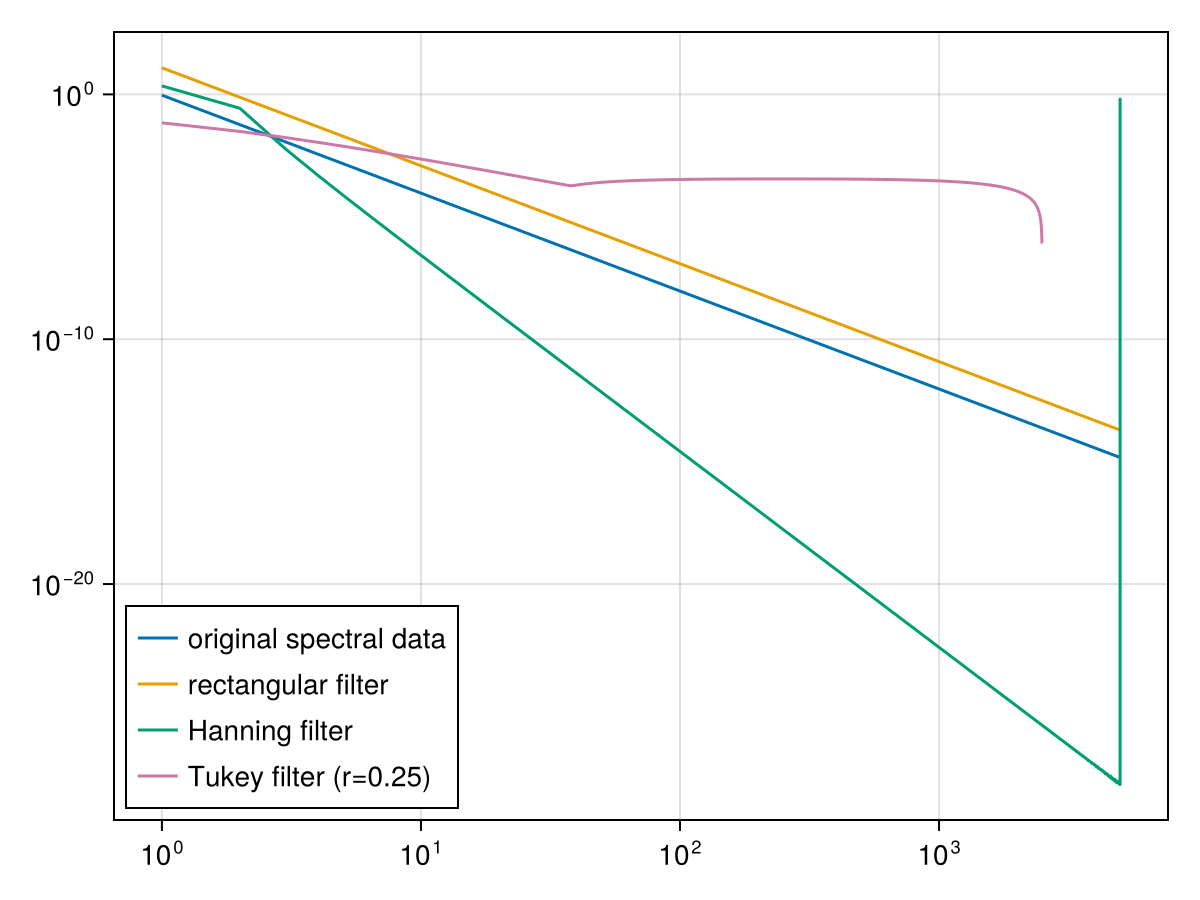

In [5]:
N = 5000
N_half = Int(N/2)
x = zeros(N)
x = @. (1:N) / N * 2π
B = x.^(-2)
A = ifft(B)
#A = sin.(50 * x) + sin.(40 * x) + sin.(12 * x)
fig = Figure()
ax = Axis(fig[1,1]
    , xscale=log10, yscale=log10)

control = abs.(B).^2
control = control/(sum(control) - control[1] - control[N_half+1])

data1 = abs.(fft(A)).^2
data1 = data1/(sum(data1) - data1[1] - data1[N_half+1])
rect = data1[2:N_half] + data1[end:-1:(N_half+2)]

window = hann(N)
data2 = (abs.(fft(A[:] .* window[:]))).^2
data2 = data2 / (sum(data2) - data2[1] - data2[N_half+1])
hann_data = data2[2:N_half] + data2[end:-1:(N_half+2)]

data3 = (abs.(fft(A .* hamm(N))))
data3 /= sum(data3)

data4 = (abs.(fft(A .* triangle(N))))
data4 /= sum(data4)

data5 = (abs.(fft(A .* tukey(N, 0.0001))))
data5 /= sum(data5)

data6 = (abs.(fft(A .* flattopw(N))))
data6 /= sum(data6)

lines!(ax, abs2.(B) / sum(abs2.(B)), label="original spectral data")
lines!(ax, data1, label="rectangular filter")
lines!(ax, data2, label="Hanning filter")
#lines!(ax, data3[2:N_half] + data3[end:-1:N_half+2], label="Hamming filter")
#lines!(ax, data4[2:N_half] + data4[end:-1:N_half+2], label="triangular filter")
lines!(ax, data5[2:N_half] + data5[end:-1:N_half+2], label="Tukey filter (r=0.25)")
#lines!(ax, data6[2:N_half] + data6[end:-1:N_half+2], label="Flat top")

#lines!(ax, ω_pos, abs2.(B[2:N_half]))
axislegend(position=:lb)
fig

In [7]:
besseli

LoadError: UndefVarError: `besseli` not defined

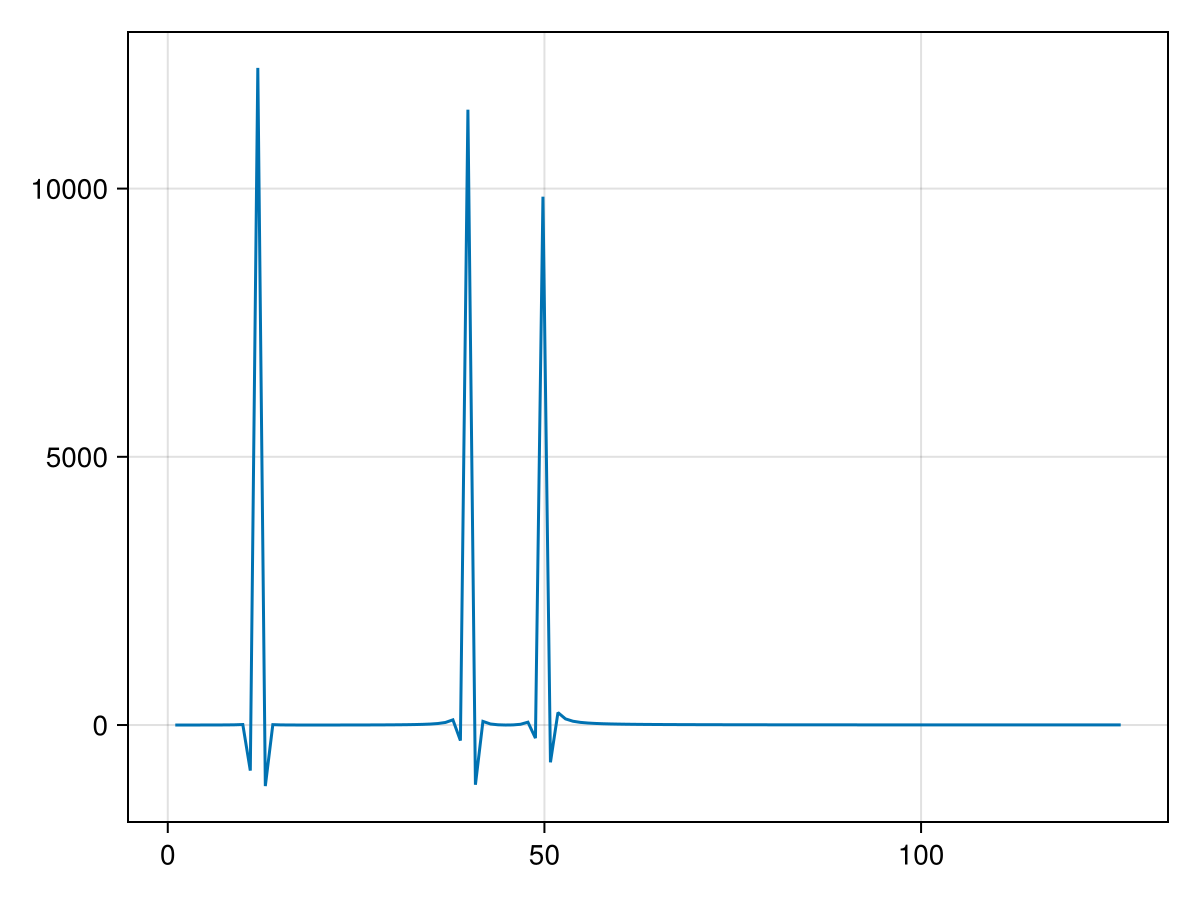

In [63]:
lines(ω_pos, data1 - data2)

In [36]:
ω[1:N_half+2]

130-element Vector{Float64}:
    0.0
    0.99609375
    1.9921875
    2.98828125
    3.984375
    4.98046875
    5.9765625
    6.97265625
    7.96875
    8.96484375
    9.9609375
   10.95703125
   11.953125
    ⋮
  117.5390625
  118.53515625
  119.53125
  120.52734375
  121.5234375
  122.51953125
  123.515625
  124.51171875
  125.5078125
  126.50390625
 -127.5
 -126.50390625